In [6]:
!rm /App/output/aggregated_10.csv
!rm -rf /App/output/train_10
!mkdir /App/output/train_10

rm: cannot remove '/App/output/aggregated_10.csv': No such file or directory


In [7]:
%%bash
rm /App/logs/client.logs
echo 135980 > /App/output/train_10/validate_135980.csv
for i in $(seq 1 200)
do
mn -c
cd /App/mininettest/ && python3 /App/mininettest/congestiontest.py --weight_file /App/output/train_0/weights_135980_steps.h5 --rtt 10 --valid_congestion 0
time=$(tail -1 /App/logs/client.logs | awk '{print $3}')
echo $time >> /App/output/train_10/validate_135980.csv
done

*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
*** Error setting resource limits. Mininet's performance may be affected.
Traceback (most recent call last):
  File "/App/mininettest/congestiontest.py", line 83, in <module>
    do_training(args.training, args.wfile, args.epsilon, args.rtt, args.vcong)
  File

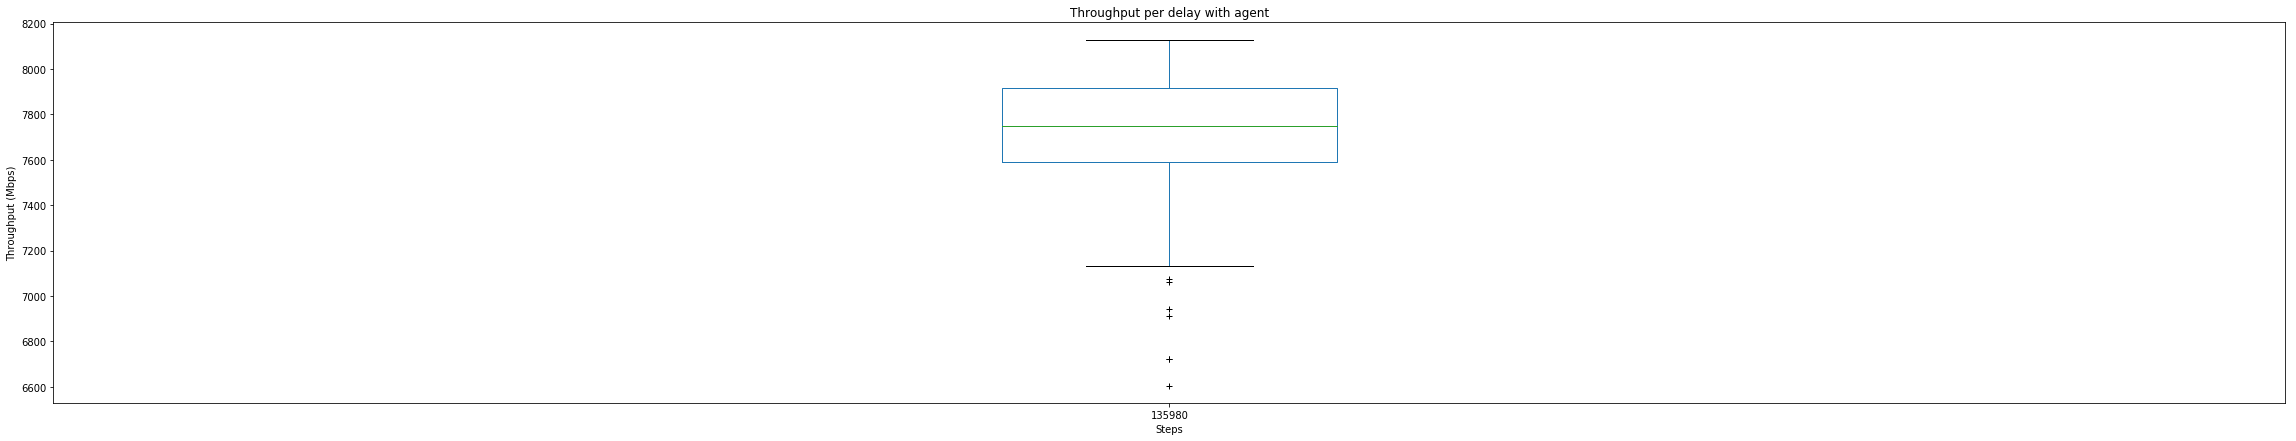

In [8]:
import pandas

rtt_135980 = pandas.read_csv("/App/output/train_10/validate_135980.csv")

%matplotlib inline
import matplotlib.pyplot as plt

from IPython.core.pylabtools import figsize
figsize(40, 7)

(2*8 * 1024 * 1024 / rtt_135980).plot.box(sym='+')
plt.ylabel("Throughput (Mbps)")
plt.xlabel("Steps")
plt.title("Throughput per delay with agent")


In [9]:
(2*8 * 1024 * 1024 / rtt_135980).median()

135980    7746.991604
dtype: float64

In [10]:
(2*8 * 1024 * 1024 / rtt_135980).mean()

135980    7714.199192
dtype: float64